# **Bank Marketing Campaign**
### **Created By : Abidzar Al Giffary**

## **Business Problem Understanding**

**Context**  
Tipe dari produk finansial yang digunakan masyarakat sudah semakin beragam. Salah satu produk finansial yang sudah diketahui masyarakat adalah deposito berjangka. Cara kerja dari deposito berjangka ini adalah nasabah mendepositkan uangnya di bank atau instansi finansial lainnya, kemudian uangnya hanya bisa diambil setelah periode deposit berakhir. Sebagai kompensasi, nasabah akan diberikan bunga tetap sesuai dengan jumlah uang yang didepositkan. Meskipun demikian, sebagai bisnis yang menawarkan produk finansial dan membutuhkan nasabah, bank tetap harus berkompetisi untuk mendapatkan nasabah atau setidaknya jangan sampai kehilangan nasabah. Salah satu cara yang bisa dilakukan untuk mendapatkan nasabah baru adalah melakukan promosi atau menawarkan produk deposit ini. 

Target :

0 : Melakukan deposit berjangka 

1 : Tidak melakukan deposit berjangka

**Problem Statement :**

Proses pemasaran bisa memakan waktu dan sumber daya jika bank menargetkan semua nasabah tanpa melakukan penyaringan terlebih dahulu. Bank ingin meningkatkan efisiensi promosi dengan mengetahui nasabah mana yang kemungkinan akan melakukan deposit berjangka supaya kegiatan promosi yang dilakukan tidak membuang banyak biaya.

**Goals :**

Maka berdasarkan permasalahan tersebut, bank ingin memiliki kemampuan untuk memprediksi kemungkinan seorang nasabah akan/ingin mendepositkan uangnya pada bank tersebut atau tidak, sehingga dapat memfokuskan promosi/penawaran pada nasabah yang bersedia melakukan deposit pada bank tersebut.

Dan juga, bank ingin mengetahui faktor/variabel apa yang membuat seorang nasabah mau melakukan deposit berjangka, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati nasabah potensial (nasabah yang ingin melakukan deposit berjangka) .

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan nasabah yang mau melakukan deposit berjangka di bank dan yang tidak mau.

Kemudian kita akan membangun model klasifikasi yang akan membantu bank untuk dapat memprediksi probabilitas seorang nasabah akan/ingin melakukan deposit berjangka di bank tersebut.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya promosi, waktu dan sumber daya

Type 2 error : False Negative  
Konsekuensi: kehilangan calon nasabah potensial 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost promosi/pemasaran produk dari bank tersebut, tetapi tanpa membuat menjadi kurangnya/tidak cukup nasabah potensial yang dibutuhkan bank. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah roc_auc.

## **Data Understanding**

Note : 
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategori (Nominal, Ordinal, Binary), beberapa dengan kardinalitas tinggi
- Setiap baris data merepresentasikan informasi seorang nasabah yang ditawarkan produk deposit dimasa lalu

### **Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| age | Numerikal | Usia dari nasabah |
| job | Kategorikal | Profesi nasabah |
| balance | Numerikal | Saldo sisa nasabah |
| housing | Kategorikal | Cicilan rumah nasabah |
| loan | Kategorikal | Cicilan pribadi nasabah |
| contact | Kategorikal | Tipe alat komunikasi nasabah |
| month | Kategorikal | Bulan terakhir nasabah dihubungi |
| campaign | Numerikal | Jumlah penawaran yang dilakukan |
| pdays | Numerikal | Jumlah hari setelah terakhir menghubungi |
| poutcome | Kategorikal | Hasil dari penawaran yang dilakukan |
| deposit | Kategorikal | Sudah berlangganan deposit atau belum |

In [585]:
# Library
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Selection
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Imbalance Dataset
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Ignore Warning
import pickle
import warnings
warnings.filterwarnings('ignore')

In [553]:
bank = pd.read_csv('data_bank_marketing_campaign.csv')
bank.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [554]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


# **Data Cleaning**
tidak ada missing value pada dataset ini sehingga untuk mendapatkan hasil prediksi yang optimal, kita akan menggunakan semua kolom atau feature yang ada untuk melakukan analisis dan modeling.

In [555]:
bank.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Berdasarkan deskripsi dari kolom numerikal di atas, kita mendapat informasi bahwa : 
* rata-rata usia nasabah bank adalah 41 tahun dengan usia nasabah paling muda adalah 18 tahun dan yang paling tua adalah 95 tahun.  
* Kemudian untuk saldo rata-rata yang tersisa pada nasabah bank adalah $1512 dengan saldo minimum yaitu -$6847 yang berarti nasabah ini masih memiliki hutang. nasabah dengan saldo sisa terbanyak adalah $66653.  
* Selanjutnya rata-rata penawaran yang diberikan kepada nasabah bank adalah 2 kali dengan minimal nasabah pasti ditawarkan sekali dan paling banyak ditawarkan 63 kali.  
* Kemudian pada kolom pdays kita dapat mengetahui bahwa nasabah rata-rata dihubungi tiap 51 hari dengan minimal -1 hari yang berarti menolak untuk dihubungi atau sudah mengikuti program dari bank dan maksimal dihubungi setelah 854 hari karena tidak adanya konfirmasi dari nasabah tersbut.  


In [556]:
bank.describe(include=['O'])

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


Berdasarkan deskripsi dari kolom kategorikal di atas, kita dapat mengetahui bahwa :
* Pada kolom pekerjaan/job terdapat 12 jenis pekerjaan nasabah dengan management sebagai jenis pekerjaan nasabah yang paling umum/banyak yaitu 1792 nasabah.  
* Pada kolom housing dapat terlihat bahwa banyak nasabah yang tidak memiliki cicilan untuk rumah, jumlahnya 4140 nasabah. 
* Untuk kolom loan dapat dilihat bahwa banyak nasabah yang tidak memiliki cicilan pribadi, jumlahnya 6789 nasabah.
* Pada kolom contact bisa diketahui bahwa kebanyakan nasabah menggunakan hp untuk bisa dihubungi dengan jumlahnya 5628 nasabah.
* Untuk kolom month kita dapat mengetahui bahwa kebanyakan nasabah terakhir dihubungi pada bulan may dengan jumlahnya 1976 nasabah.
* Pada kolom poutcome bisa dilihat bahwa hasil dari penawaran yang diberikan kebanyakan hasilnya tidak diketahui dengan jumlahnya 5816 nasabah.
* Untuk kolom deposit dapat dilihat bahwa kebanyakan nasabah tidak melakukan deposit dengan jumlahnya 4081 nasabah.

Selanjutnya kita akan melakukan pengecekan data-data unik yang terdapat pada dataset : 

In [557]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in bank.columns :
    listItem.append( [col, bank[col].nunique(), bank[col].unique()])

BankDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
BankDesc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


Bisa kita lihat pada kolom job, contact, dan outcome terdapat data unknown, sehingga untuk mengoptimalkan dan mempermudah proses analisis dan modeling, kita dapat memasukkan **data unknown menjadi data other**.

In [558]:
bank['job'] = bank['job'].replace('unknown', 'other', regex=True)
bank['contact'] = bank['contact'].replace('unknown', 'other', regex=True)
bank['poutcome'] = bank['poutcome'].replace('unknown', 'other', regex=True)

Selanjutnya kita akan melakukan pengecekan, apakah terdapat data duplikat pada dataset ini.

In [559]:
bank[bank.duplicated(keep=False)].sort_values(['age','job','balance','housing','loan','contact','month','campaign','pdays','poutcome','deposit'])

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2486,30,blue-collar,239,yes,no,other,may,1,-1,other,yes
7077,30,blue-collar,239,yes,no,other,may,1,-1,other,yes
1468,34,management,0,no,no,cellular,aug,2,-1,other,no
5905,34,management,0,no,no,cellular,aug,2,-1,other,no
223,38,technician,0,no,no,cellular,aug,2,-1,other,no
5681,38,technician,0,no,no,cellular,aug,2,-1,other,no
1381,39,technician,0,yes,no,other,may,1,-1,other,no
5609,39,technician,0,yes,no,other,may,1,-1,other,no
330,40,blue-collar,0,yes,no,other,may,2,-1,other,no
2944,40,blue-collar,0,yes,no,other,may,2,-1,other,no


Untuk mengoptimalkan proses analisis dan modeling maka kita perlu menghapus kolom duplikat yang terdapat pada dataset.

In [560]:
bank = bank.drop_duplicates()
bank.shape

(7805, 11)

Selanjutnya kita pastikan tidak terdapat **missing value** pada dataset

In [561]:
bank.isna().sum()/bank.shape[0]*100

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
dtype: float64

Berdasarkan pengecekan di atas maka sudah bisa dipastikan bahwa tidak terdapat **missing value** pada dataset  

Selanjutnya kita cek apakah terdapat **multicolinearity** antar kolom/feature pada dataset:

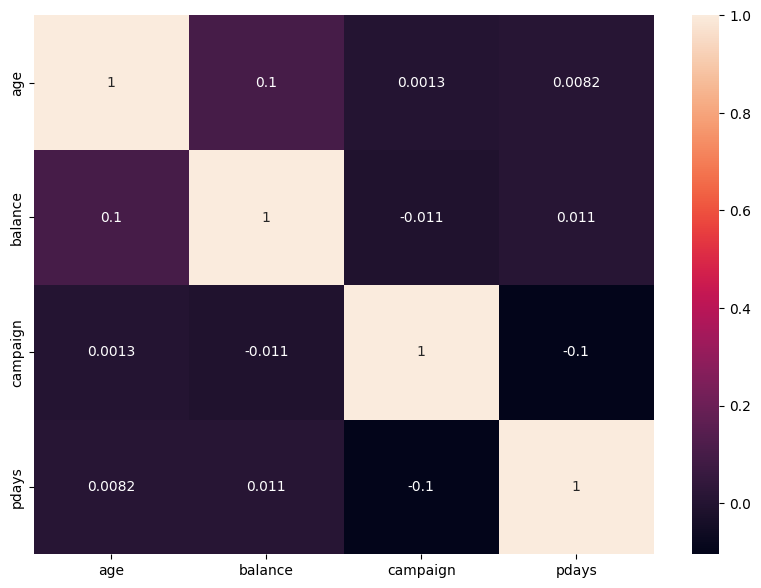

In [562]:
bank_num = bank[['age', 'balance', 'campaign', 'pdays']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_num.corr(), annot= True,)
plt.show()

Berdasarkan Heatmap di atas dapat terlihat bahwa tidak adanya **multicolinearity** yang berarti tidak ada hubungan yang kuat atau korelasi antar tiap feature/kolom.

# **Data Analysis** 

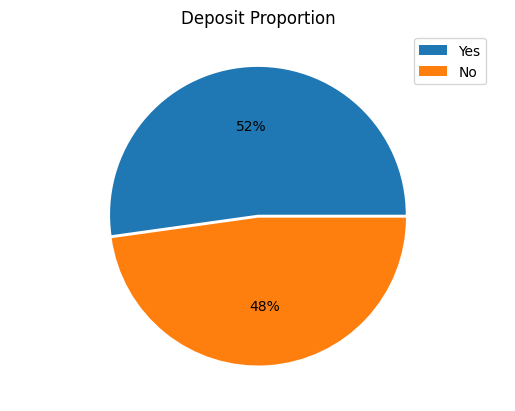

In [563]:
plt.gca().axis('equal')
bank['deposit'].value_counts().plot(kind= 'pie', autopct= '%1.0f%%', labels= None, explode= (0.01, 0.01))
plt.title('Deposit Proportion')
plt.legend(['Yes', 'No',], bbox_to_anchor=(0.8,1))
plt.ylabel(None)
plt.show()

Berdasarkan Piechart diatas dapat terlihat bahwa persentase nasabah yang tidak deposit sedikit lebih tinggi dibandingkan dengan yang deposit cenderung seimbang (Balance)

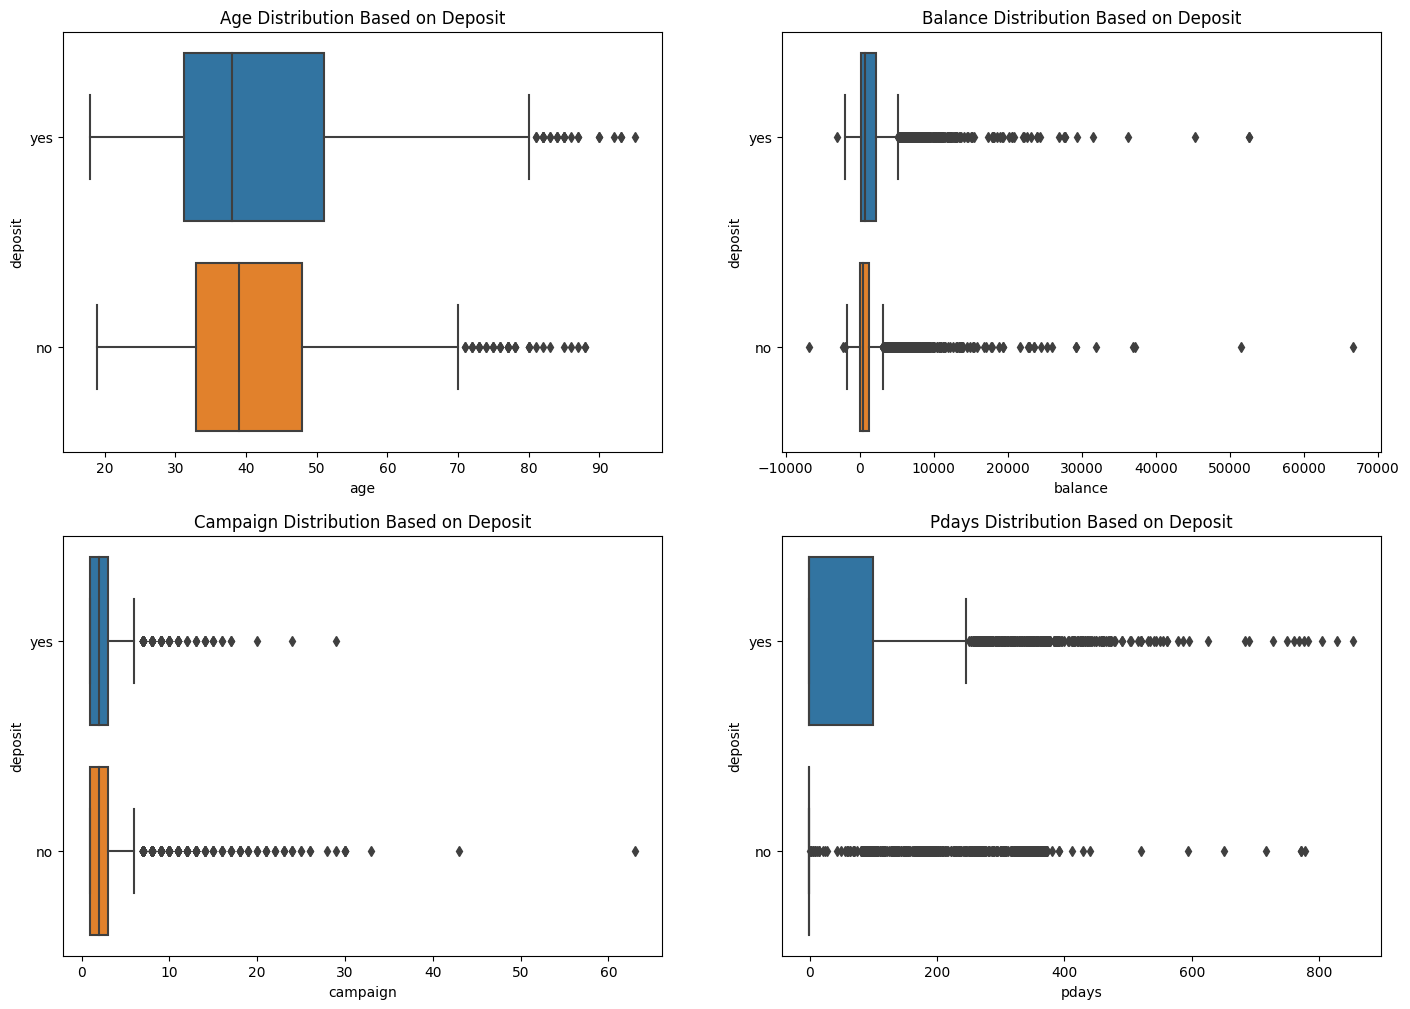

In [564]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=bank,x='age', y='deposit')
plt.title('Age Distribution Based on Deposit')

plt.subplot(222)
sns.boxplot(data=bank,x='balance', y='deposit')
plt.title('Balance Distribution Based on Deposit')

plt.subplot(223)
sns.boxplot(data=bank,x='campaign', y='deposit')
plt.title('Campaign Distribution Based on Deposit')

plt.subplot(224)
sns.boxplot(data=bank,x='pdays', y='deposit')
plt.title('Pdays Distribution Based on Deposit')
plt.show()

Informasi yang kita dapatkan berdasarkan boxplot di atas adalah sebagai beirkut : 
* Feature Age, Balance, dan Campaign memiliki kemiripan bentuk, yang membedakan hanya outliers pada tiap feature.
* Terdapat perbedaan yang signifikan pada feature pdays (jumlah hari setelah pemasaran terakhir). Nasabah yang pdays nya kecil (baru saja dihubingi) cenderung mendepositkan uangnya walaupun terdapat banyak outliers pada feature.
* Feature numerical yang terdapat pada dataset tidak terdistribusi normal.
* Outliers yang ada dibiarkan saja karena bisa membantu proses permodelan dan keberadaannya memiliki dasar yang logis. Jika dihilangkan khawatir mempengaruhi performa model.


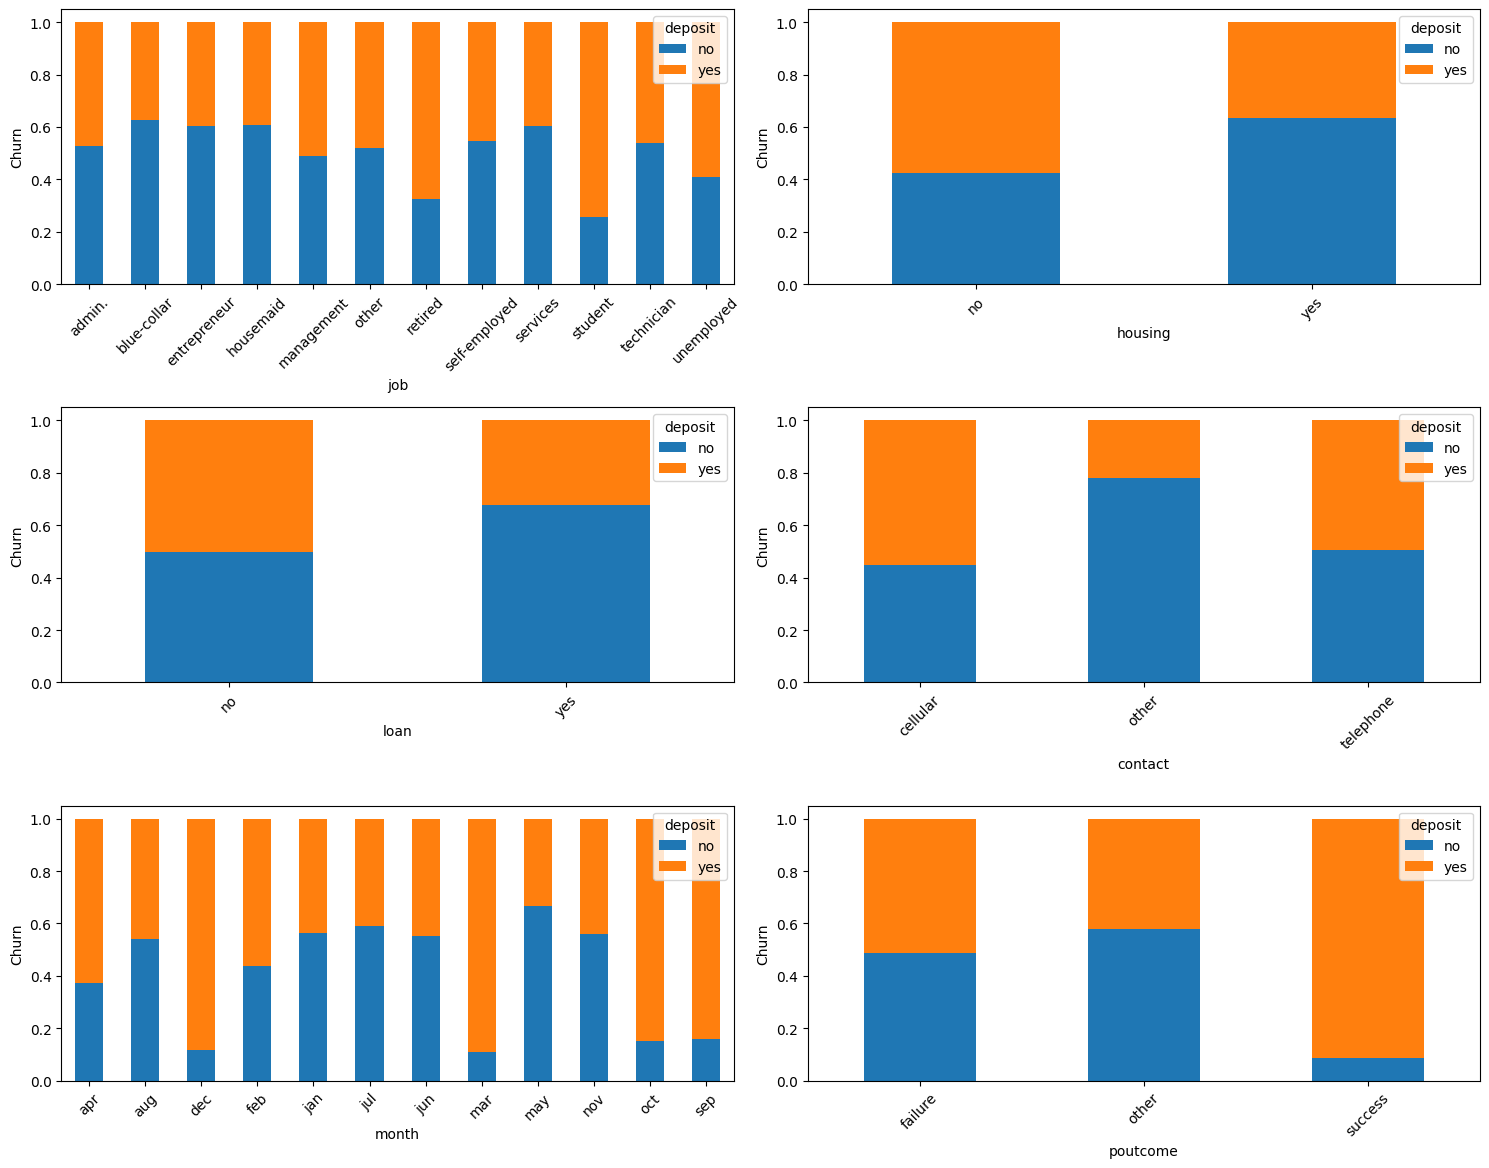

In [565]:
count = 0 
fig= plt.figure(figsize= (15,15))

for i in bank[['job', 'housing', 'loan', 'contact', 'month', 'poutcome']].columns:
    count += 1
    ax = plt.subplot(4,2,count)
    pd.crosstab(bank[i], bank['deposit'], normalize= 0).plot(kind= 'bar', stacked= True, ax= ax)
    fig.tight_layout()
    plt.xticks(rotation=45)
    plt.ylabel('Churn')

plt.show()

In [566]:
for i in bank[['job', 'housing', 'loan', 'contact', 'month', 'poutcome']].columns:
    col = bank.groupby(i)['deposit'].value_counts(normalize= True).unstack()
    display(col.sort_values(by=['yes'], ascending= False))

deposit,no,yes
job,,
student,0.255061,0.744939
retired,0.324074,0.675926
unemployed,0.409639,0.590361
management,0.489659,0.510341
other,0.518519,0.481481
admin.,0.525641,0.474359
technician,0.538402,0.461598
self-employed,0.546429,0.453571
entrepreneur,0.601695,0.398305


deposit,no,yes
housing,,
no,0.422631,0.577369
yes,0.634233,0.365767


deposit,no,yes
loan,,
no,0.498599,0.501401
yes,0.677734,0.322266


deposit,no,yes
contact,,
cellular,0.448871,0.551129
telephone,0.505495,0.494505
other,0.779340,0.220660


deposit,no,yes
month,,
mar,0.110553,0.889447
dec,0.117647,0.882353
oct,0.150350,0.849650
sep,0.160377,0.839623
apr,0.373112,0.626888
feb,0.436330,0.563670
aug,0.542091,0.457909
jun,0.550758,0.449242
nov,0.558600,0.441400


deposit,no,yes
poutcome,,
success,0.085414,0.914586
failure,0.487028,0.512972
other,0.580536,0.419464


Informasi yang kita dapatkan berdasarkan barplot di atas adalah sebagai berikut :
* Nasabah dengan pekerjaan `student (pelajar)` dan `retired (pensiunan)` cenderung lebih memilih untuk mendeposit uangnya dibandingkan dengan nasabah dengan pekerjaan lain.
* Nasabah yang tidak memiliki cicilan rumah atau `housing (no)` cenderung lebih memilih untuk mendeposit uangnya dibandingkan dengan nasabah yang memiliki cicilan rumah `housing (yes)`
* Nasabah yang tidak memiliki cicilan pribadi atau `loan (no)` cenderung lebih memilih untuk mendeposit uangnya dibandingkan dengan nasabah yang memiliki cicilan pribadi `loan (yes)`
* Nasabah yang dihubungi melalui `Handphone (cellular)` cenderung lebih memilih untuk mendeposit uangnya dibandingkan dengan nasabah yang dihubungi melalui `telepon (telephone)` dan `lainnya (other)`.
* Nasabah yang dihubungi pada bulan `maret (mar), desember (dec), october (oct), dan september (sep)` cenderung memilih untuk mendeposit uangnya dibandingkan dengan nasabah yang dihubungi di bulan-bulan lain.
* Nasabah yang `success` hasil pemasarannya cenderung memilih untuk mendeposit uangnya dibandingkan dengan nasabah yang hasil pemasarannya `gagal (failure) dan lainnya (other)`.

# **Data Preparation** 

In [567]:
bank.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,other,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,other,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,other,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,other,no


Feature Kategorikal yang terdapat pada data ini akan kita Encoding supaya dapat digunakan untuk modeling. Feature tersebut adalah `job, housing, loan, contact, month, poutcome`. Feature tersebut kita encoding menggunakan OneHotEncoder karena unique datanya sedikit dan tidak ordinal/tidak memiliki urutan. kita akan menggunakan semua feature yang telah di-encoding sehingga kita tidak menggunakan `drop=first`.

In [568]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']),
    ('scaling', RobustScaler(),['age','balance','campaign','pdays'])
    ], remainder= 'passthrough')

In [569]:
x = bank.drop(columns= ['deposit'])
y = bank['deposit']

In [570]:
x_train, x_test, y_train, y_test= train_test_split(
    x, 
    y, 
    stratify= y, 
    test_size=0.2, 
    random_state=17)

In [571]:
testing = pd.DataFrame(transformer.fit_transform(x_train).toarray(),columns=transformer.get_feature_names_out())
testing.head()

,onehot__job_admin.,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_other,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,...,onehot__month_nov,onehot__month_oct,onehot__month_sep,onehot__poutcome_failure,onehot__poutcome_other,onehot__poutcome_success,scaling__age,scaling__balance,scaling__campaign,scaling__pdays
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.235294,-0.229117,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.705882,-0.166746,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.647059,-0.304216,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.058824,-0.061734,-0.5,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.941176,-0.342403,1.0,0.0


# **Modeling & Evaluation**

In [572]:
# DecsionTree
tree = DecisionTreeClassifier(random_state=17)

# RandomForest
rf = RandomForestClassifier(random_state=17)

# Adaboost
ada = AdaBoostClassifier(tree, random_state=17)

# Gradientboost
gbc = GradientBoostingClassifier(random_state=17)

# Logistic Regression
logreg = LogisticRegression(random_state=17)

# KNN
knn = DecisionTreeClassifier(random_state=17)

## **Model Benchmarking : K-Fold**

In [573]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('Model', knn)
])
skfold= StratifiedKFold(n_splits=10, shuffle= True, random_state= 10)
hyperparams= {
    'Model' : [tree, rf, ada, gbc, logreg, knn]
}

grid_model = GridSearchCV(estimator, param_grid= hyperparams, cv= skfold, scoring= 'roc_auc', n_jobs= -1)

In [574]:
grid_model.fit(x_train, y_train)
print(grid_model.best_score_)
print(grid_model.best_params_)
pd.DataFrame(grid_model.cv_results_).sort_values(by= 'rank_test_score').set_index('param_Model').drop('params', axis= True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.7775425382752215
{'Model': GradientBoostingClassifier(random_state=17)}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
param_Model,,,,,,,,,,,,,,,,,
GradientBoostingClassifier(random_state=17),0.589366,0.034679,0.006850,0.002958,0.748661,0.780090,0.819116,0.771688,0.788112,0.796228,0.789532,0.765142,0.770000,0.746855,0.777543,0.020881,1
LogisticRegression(random_state=17),0.070779,0.014427,0.006120,0.003371,0.733416,0.757864,0.787677,0.754334,0.780520,0.778863,0.774447,0.745471,0.753901,0.739840,0.760633,0.017736,2
RandomForestClassifier(random_state=17),1.630796,0.096439,0.028745,0.006549,0.712005,0.749097,0.785999,0.760885,0.759455,0.763418,0.779064,0.760762,0.738662,0.713839,0.752319,0.023391,3
"AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=17),\n random_state=17)",3.497652,0.325081,0.015825,0.003539,0.607116,0.683572,0.670251,0.640381,0.656709,0.667996,0.686612,0.669422,0.662016,0.637182,0.658126,0.022812,4
DecisionTreeClassifier(random_state=17),0.093008,0.008287,0.008151,0.002671,0.582519,0.641484,0.643279,0.645793,0.613744,0.629040,0.639725,0.636519,0.604881,0.592272,0.622926,0.021836,5
DecisionTreeClassifier(random_state=17),0.076127,0.016636,0.003725,0.001460,0.582519,0.641484,0.643279,0.645793,0.613744,0.629040,0.639725,0.636519,0.604881,0.592272,0.622926,0.021836,5


Terlihat bahwa model Gradient Boost adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan default hyperparameter

## **Model Benchmarking : Test Data**

In [575]:
models = [tree, rf, ada, gbc, logreg, knn]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Decision Tree', 'Random Forest', 'AdaBoost','GradientBoost', 'Logistic Regression', 'KNN']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Decision Tree', 'Random Forest', 'AdaBoost','GradientBoost', 'Logistic Regression', 'KNN'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Decision Tree 
               precision    recall  f1-score   support

          no       0.64      0.64      0.64       815
         yes       0.60      0.60      0.60       746

    accuracy                           0.62      1561
   macro avg       0.62      0.62      0.62      1561
weighted avg       0.62      0.62      0.62      1561

Random Forest 
               precision    recall  f1-score   support

          no       0.69      0.77      0.73       815
         yes       0.72      0.63      0.67       746

    accuracy                           0.70      1561
   macro avg       0.71      0.70      0.70      1561
weighted avg       0.70      0.70      0.70      1561

AdaBoost 
               precision    recall  f1-score   support

          no       0.63      0.63      0.63       815
         yes       0.59      0.59      0.59       746

    accuracy                           0.61      1561
   macro avg       0.61      0.61      0.61      1561
weighted avg       0.61      0.

,roc_auc score
model,
GradientBoost,0.779429
Logistic Regression,0.758554
Random Forest,0.757392
AdaBoost,0.657202
Decision Tree,0.619597
KNN,0.619597


Dapat dilihat bahwa GradientBoost kembali menjadi model yang terbaik performanya pada test data.

Selanjutnya kita akan melakukan Hyperparameter Tuning untuk meningkatkan performanya.

## **Hyperparameter Tuning**

In [576]:
estimate= Pipeline([
    ('preprocess', transformer),
    ('gbc', GradientBoostingClassifier(random_state=17))
])

hyperparams = {
    'gbc__learning_rate': [0.01, 0.1, 1],
    'gbc__n_estimators': [50, 100, 200],
    'gbc__max_depth': [3, 5, None],
    'gbc__min_samples_split': [2, 4, 8],
    'gbc__min_samples_leaf': [1, 2, 4],
    'gbc__max_features': ['auto', 'sqrt', 'log2'],
    'gbc__subsample': [0.5, 0.8, 1.0],
    'gbc__random_state' : [17]
}

default hyperparameter GradientBoost=> `learning_rate` = 0.01, `n_estimator` = 50, `max_depth` = 3, `min_samples_split` = 2, `min_samples_leaf` = 1, `max_features` = `auto`, `subsample` = 0.5, `random_state` = 17

In [577]:
grid_hype = RandomizedSearchCV(
    estimator= estimate, 
    param_distributions= hyperparams, 
    scoring= 'roc_auc',
    cv= StratifiedKFold(n_splits= 10, shuffle= True, random_state= 10),
    n_jobs= -1,
    random_state= 17
)

In [578]:
grid_hype.fit(x_train, y_train)
print(grid_hype.best_score_)
print(grid_hype.best_params_)
pd.DataFrame(grid_hype.cv_results_).sort_values(by= 'rank_test_score').set_index('rank_test_score')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has 

0.7790832588914091
{'gbc__subsample': 1.0, 'gbc__random_state': 17, 'gbc__n_estimators': 50, 'gbc__min_samples_split': 2, 'gbc__min_samples_leaf': 1, 'gbc__max_features': 'sqrt', 'gbc__max_depth': 5, 'gbc__learning_rate': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbc__subsample,param_gbc__random_state,param_gbc__n_estimators,param_gbc__min_samples_split,param_gbc__min_samples_leaf,param_gbc__max_features,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,,,
1,0.200721,0.020725,0.008404,0.003070,1.0,17,50,2,1,sqrt,...,0.818193,0.775438,0.794195,0.795055,0.789831,0.768034,0.768739,0.754745,0.779083,0.019926
2,2.056580,0.105795,0.009690,0.002666,1.0,17,200,2,2,auto,...,0.816705,0.768918,0.785384,0.794345,0.784308,0.767911,0.763073,0.750669,0.775914,0.019431
3,0.192085,0.015540,0.007228,0.002681,0.8,17,50,2,1,log2,...,0.806800,0.756402,0.778076,0.790485,0.768230,0.754370,0.752018,0.744822,0.767269,0.018812
4,0.165292,0.025014,0.005597,0.001905,0.5,17,50,4,4,log2,...,0.805179,0.754981,0.778343,0.792317,0.765518,0.750510,0.750726,0.743052,0.766863,0.019204
5,1.910293,0.109893,0.018443,0.004700,0.8,17,50,4,2,log2,...,0.780598,0.749713,0.756536,0.763248,0.771030,0.751596,0.748147,0.717627,0.749386,0.021049
6,4.732456,0.132020,0.035042,0.004378,1.0,17,100,4,2,sqrt,...,0.768051,0.741223,0.756320,0.757761,0.762146,0.754910,0.745286,0.707127,0.744304,0.020051
7,0.251804,0.023682,0.007661,0.003288,0.8,17,100,2,1,sqrt,...,0.770585,0.754165,0.767607,0.744884,0.758569,0.741333,0.759455,0.717200,0.742744,0.023008
8,2.989375,0.239265,0.013306,0.003054,1.0,17,50,8,1,auto,...,0.758818,0.740731,0.735321,0.739830,0.747221,0.750247,0.706499,0.710164,0.731117,0.018833
9,0.482131,0.044946,0.005028,0.001872,0.8,17,50,8,4,auto,...,0.718489,0.707589,0.709361,0.702773,0.691913,0.707343,0.725398,0.667219,0.698865,0.017836


Hyperparameter terbaik GradientBoost dari hasil Gridsearch => `learning_rate` = 0.1, `n_estimator` = 50, `max_depth` = 5, `min_samples_split` = 2, `min_samples_leaf` = 1, `max_features` = `sqrt`, `subsample` = 1.0, `random_state` = 17

Untuk hyperparameter `n_estimator`, `min_samples_split`, `min_samples_leaf`, dan `random_state` default valuenya tetap yang terbaik, untuk `learning_rate`, `max_depth`, dan `subsample` bisa dicoba diperbesar lagi dan dibandingkan dengan value terbaiknya sekarang yaitu 0.1 (`learning_rate`), 5 (`max_depth`), 1.0 (`subsample`), untuk `max_features` bisa diubah dari `auto` dibandingkan dengan `sqrt` (value terbaiknya sekarang).

Tetapi untuk kali ini hyperparameter tuning yang akan kita lakukan hanya sampai sini saja, teman-teman nanti bisa mencoba tuning lebih lagi sendiri mengikuti petunjuk yang ada diatas ini. Dan juga sebenarnya kalau random_state dari modelnya dan KFoldnya berbeda akan menghasilkan hyperparameter terbaik yg berbeda juga, karena hasil dipengaruhi oleh datanya juga.

In [579]:
tuned_model = grid_hype.best_estimator_
tuned_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('scaling', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('gbc',
                 GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                                            n_estimators=50,
                                            random_state=17))])

In [580]:
estimate.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('scaling', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('gbc', GradientBoostingClassifier(random_state=17))])

In [581]:
y_pred_def = estimate.predict(x_test)
y_pred_proba_def = estimate.predict_proba(x_test)
y_pred_tuned = tuned_model.predict(x_test)
y_pred_proba_tuned = tuned_model.predict_proba(x_test)

roc_auc_def = roc_auc_score(y_test, y_pred_proba_def[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Test GradientBoost Default: ', roc_auc_def)
print('ROC AUC Score Test GradientBoost Tuned: ', roc_auc_tuned)

ROC AUC Score Test GradientBoost Default:  0.7794289379759536
ROC AUC Score Test GradientBoost Tuned:  0.7805177716738763


Terlihat bahwa model GradientBoost setelah kita tuning hyperparameternya memiliki nilai ROC AUC yang lebih baik walaupun hanya naik sedikit saja.

Selanjutnya kita akan melihat juga hasil perbandingan classification reportnya

In [582]:
report_def = classification_report(y_test, y_pred_def)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Test GradientBoost Default: \n', report_def)
print('Classification Report Test GradientBoost Tuned: \n', report_tuned)

Classification Report Test GradientBoost Default: 
               precision    recall  f1-score   support

          no       0.70      0.86      0.77       815
         yes       0.79      0.59      0.68       746

    accuracy                           0.73      1561
   macro avg       0.74      0.72      0.72      1561
weighted avg       0.74      0.73      0.72      1561

Classification Report Test GradientBoost Tuned: 
               precision    recall  f1-score   support

          no       0.69      0.84      0.76       815
         yes       0.77      0.59      0.67       746

    accuracy                           0.72      1561
   macro avg       0.73      0.72      0.71      1561
weighted avg       0.73      0.72      0.72      1561



Dapat terlihat bahwa model GradientBoost dengan kondisi default/tidak dituning, hyperparameternya memiliki classification report yang lebih baik walaupun hanya lebih baik sedikit saja. Oleh karena itu kita akan menggunakan model GradientsBoost yang tidak di tuned sebagai model akhir kita.

## **Feature Importances**

Selanjutnya kita lihat fitur/kolom apa saja yang paling penting untuk model GradientBoost kita

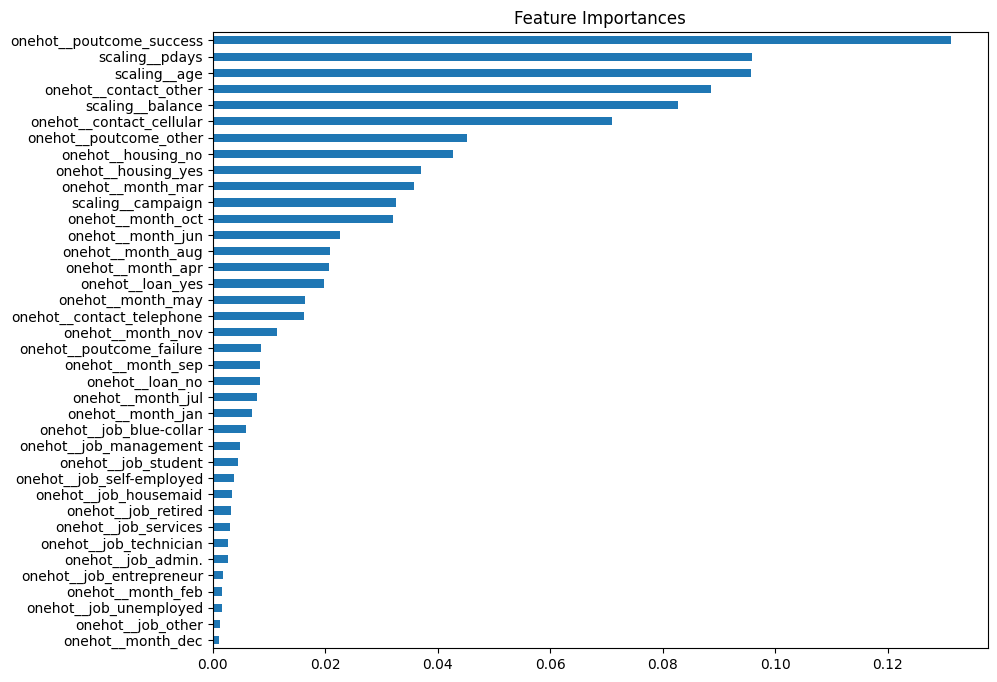

In [583]:
plt.figure(figsize=(10,8))
feature_coef = pd.Series(tuned_model['gbc'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending= True)
feature_coef.plot(kind= 'barh', title= 'Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk model GradientBoost kita, fitur/kolom poutcome_success adalah yang paling penting, kemudian diikuti dengan pdays, age, contact_other, balance, contact_cellular yang merupakan 6 fitur teratas yang sangat berpengaruh terhadap model, namun bisa kita lihat terdapat perbedaan yang signifikan antara 6 feature teratas dengan feature yang lainnya.

## **Conclusion & Recommendation**

In [584]:
print('Classification Report Tuned GradientBoost : \n', report_tuned)

Classification Report Tuned GradientBoost : 
               precision    recall  f1-score   support

          no       0.69      0.84      0.76       815
         yes       0.77      0.59      0.67       746

    accuracy                           0.72      1561
   macro avg       0.73      0.72      0.71      1561
weighted avg       0.73      0.72      0.72      1561



Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter/menyaring nasabah mana saja yang akan kita tawarkan produk deposit, maka model kita dapat mengurangi 84% nasabah yang tidak tertarik untuk tidak kita approach, dan model kita dapat mendapatkan 59% nasabah yang tertarik dari seluruh nasabah yang tertarik. (semua ini berdasarkan recallnya)

Model kita ini memiliki ketepatan prediksi nasabah yang tertarik sebesar 77% (precisionnya), jadi setiap model kita memprediksi bahwa seorang nasabah itu tertarik, maka kemungkinan tebakannya benar itu sebesar 77% kurang lebih. Maka masih akan ada nasabah yang sebenarnya tidak tertarik tetapi diprediksi sebagai nasabah yang tertarik sekitar 16% dari keseluruhan nasabah yang tidak tertarik (berdasarkan recall).

Bila seandainya biaya untuk menghubungi nasabah itu 10$, dan andaikan jumlah nasabah yang kita miliki untuk suatu kurun waktu sebanyak 200 orang (dimana andaikan 100 orang tertarik, dan 100 orang lagi tidak tertarik), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua nasabah kita hubungi dan tawarkan) :
- Total Biaya => 200 x 10 USD = 2000 USD
- Total Nasabah Tertarik yang didapatkan => 100 orang (karena semua kita tawarkan)
- Total Nasabah Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 100 x 10 USD = 1000 USD (karena 100 orang menolak dan menjadi sia-sia)
- Jumlah penghematan => 0 USD

Dengan Model (hanya Nasabah yang diprediksi oleh model tertarik yang kita hubungi dan tawarkan) :
- Total Biaya => (59 x 10 USD) + (16 x 10 USD) = 590 USD + 160 USD = 750 USD
- Total Nasabah Tertarik yang didapatkan => 59 orang (karena recall 1/yg tertarik itu 59%)
- Total Nasabah Tertarik yang tidak didapatkan => 41 orang (karena recall 1/yg tertarik itu 59%)
- Biaya yang terbuang => 16 x 10 USD = 160 USD (berdasarkan recall 0/yg tidak tertarik (16 orang menolak tawaran/tidak tertarik))
- Jumlah penghematan => 84 x 10 USD = 840 USD (yang dihitung hanya yang memang tidak tertarik saja, kalau yang tertarik tapi tidak ditawarkan itu tidak dihitung disini)

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah Nasabah potensial/Nasabah yg tertarik.

## **Recommendation**

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :  
1. Pihak Bank perlu memastikan isi dari tiap kolom/feature yang ada pada data nasabah. Pada kasus ini terdapat data `unknown` dan `other` pada kolom `contact` dan `poutcome`. Hal ini sangat disayangkan karena 2 feature tersebut sangat berpengaruh terhadap performa model.  
2. Pada proses modeling bisa ditambahkan model yang belum digunakan seperti XGB dan LGBM untuk mencari model yang lebih baik lagi.  
3. Perlunya penambahan feature/kolom untuk meningkatkan performa model. feature yang sekirany bisa ditambahkan adalah gaji, pengeluaran, tanggungan, dan hutang.  
4. Pengaruh feature `loan` dan `housing` bisa ditingkatkan dengan mendefinisikan secara jelas berapa jumlahnya, tidak hanya yes/no tapi bisa disertakan angka pada feature tersebut.  
5. Model ini hanya cocok untuk dataset yang balance sehingga jika nanti ada data lain yang imbalance maka perlu dilakukan resampling.  

## **Save Model**

In [586]:
# Save Model 
estimator.fit(x_train, y_train)
filename = 'Model_Bank_Marketing_Campaign.sav'
pickle.dump(estimator, open(filename, 'wb'))

# Load Model
filename = 'Model_Bank_Marketing_Campaign.sav'
loaded_model = pickle.load(open(filename, 'rb'))